In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime, date 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance


#Logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.pipeline import make_pipeline

import sklearn
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from scipy.stats import lognorm
from scipy.stats import norm

In [2]:
df_36 = pd.read_csv('cso_3x6x.csv')

In [3]:
df_rf = pd.read_csv('cat3rf.csv')

In [4]:
df_rf['Time'] = pd.to_datetime(df_rf['DateTime'], format = '%Y/%m/%d %H:%M')

In [5]:
df_rf = df_rf.drop(['DateTime'],axis=1)

In [6]:
df_36['DateTime']=df_36['Date']+' '+df_36['Hour']

In [7]:
df_36['Time'] = pd.to_datetime(df_36['DateTime'], format = '%d/%m/%Y %H:%M')

In [8]:
df_36 = df_36.drop(['DateTime'],axis=1)
df_36 = df_36.drop(['Date'],axis=1)
df_36 = df_36.drop(['Hour'],axis=1)

In [9]:
df_36 = df_36.drop(['Volume_3x','Volume_6x'],axis=1)

In [10]:
df_36_clear = df_36.drop(df_36[df_36['volume']==0].index)

In [11]:
#df_36_clear.drop(['Volume_3x','Volume_6x'],axis=1)

In [12]:
df_36_clear.reset_index(drop=True, inplace=True)

In [13]:
df_36_clear['flow']=0.0
df_36_clear

,volume,Time,flow
0,680.8,2005-02-24 12:00:00,0.0
1,628.9,2005-02-24 13:00:00,0.0
2,523.4,2005-02-24 14:00:00,0.0
3,576.3,2005-02-24 15:00:00,0.0
4,462.6,2005-02-24 16:00:00,0.0
...,...,...,...
2006,35.5,2014-12-27 08:00:00,0.0
2007,33.3,2014-12-27 12:00:00,0.0
2008,302.7,2014-12-27 13:00:00,0.0
2009,129.7,2014-12-27 14:00:00,0.0


In [14]:
df_rf

,Volume (cu.m),Flow (m3/s),Time
0,432.0,0.1200,2004-12-01 00:00:00
1,432.0,0.1200,2004-12-01 01:00:00
2,432.0,0.1200,2004-12-01 02:00:00
3,432.0,0.1200,2004-12-01 03:00:00
4,432.0,0.1200,2004-12-01 04:00:00
...,...,...,...
95083,739.8,0.2055,2014-12-31 19:00:00
95084,738.0,0.2050,2014-12-31 20:00:00
95085,738.0,0.2050,2014-12-31 21:00:00
95086,738.0,0.2050,2014-12-31 22:00:00


In [15]:
for k in range(len(df_36_clear['Time'])):
    for i in range(len(df_rf['Time'])):
        if df_36_clear['Time'][k] == df_rf['Time'][i]:
            df_36_clear['flow'][k] = df_rf['Flow (m3/s)'][i]
df_36_clear

,volume,Time,flow
0,680.8,2005-02-24 12:00:00,0.42225
1,628.9,2005-02-24 13:00:00,0.48775
2,523.4,2005-02-24 14:00:00,0.54100
3,576.3,2005-02-24 15:00:00,0.58875
4,462.6,2005-02-24 16:00:00,0.61400
...,...,...,...
2006,35.5,2014-12-27 08:00:00,2.36200
2007,33.3,2014-12-27 12:00:00,2.02075
2008,302.7,2014-12-27 13:00:00,1.97750
2009,129.7,2014-12-27 14:00:00,1.90850


In [17]:
df_36_clear.to_csv('df_36_clear.csv',index=False)

In [18]:
df_36_clear

,volume,Time,flow
0,680.8,2005-02-24 12:00:00,0.42225
1,628.9,2005-02-24 13:00:00,0.48775
2,523.4,2005-02-24 14:00:00,0.54100
3,576.3,2005-02-24 15:00:00,0.58875
4,462.6,2005-02-24 16:00:00,0.61400
...,...,...,...
2006,35.5,2014-12-27 08:00:00,2.36200
2007,33.3,2014-12-27 12:00:00,2.02075
2008,302.7,2014-12-27 13:00:00,1.97750
2009,129.7,2014-12-27 14:00:00,1.90850


In [19]:
mean = 0.205
sigma = 0.5

In [20]:
dist_rf=lognorm([sigma],loc=mean)

In [21]:
a = [0.025,0.034,0.052,0.068,0.090,0.120,0.148,0.183,0.243,0.410,0.666,1.603]
y = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]

In [22]:
x=np.linspace(0,21,95088)

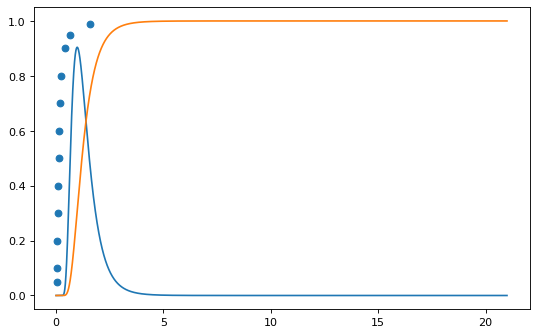

In [23]:
import pylab as pl
pl.scatter(a, y, alpha=1)
pl.plot(x,dist_rf.pdf(x))
pl.plot(x,dist_rf.cdf(x))

In [24]:
maximum = max(dist_rf.pdf(x))
maximum

0.904121632895325

In [145]:
#x = np.array(sorted(df_36_clear['volume']))
x = np.linspace(0,5000,2011)

In [146]:
mu = np.mean(x)
#sigma = 10

In [149]:
sigma,loc,mu = lognorm.fit(df_36_clear['volume'],floc=0)
pList=lognorm([sigma],loc=mu)

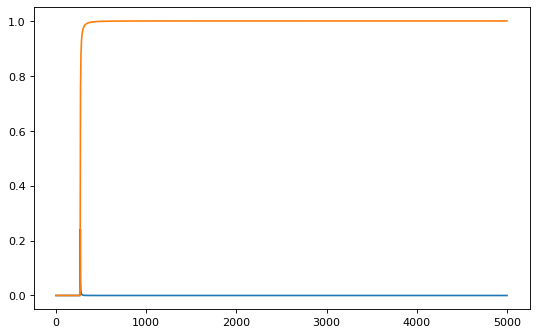

In [150]:
pl.plot(x,pList.pdf(x))
pl.plot(x,pList.cdf(x))

In [151]:
peak_cso = max(pList.pdf(x))
peak_cso

0.2413129018037619

In [152]:
pList.pdf(1000)

array([4.32854156e-07])

In [153]:
def cso_peak(peak_cso):
    x = 0
    for i in np.arange(0.0,1000.0,0.01):
        if -0.01 <= pList.pdf(i) - peak_cso <= 0.01:
            x = round(i,2)
    return x

In [154]:
cso_peak(peak_cso)

268.69

In [60]:
peak_cso

0.08308421169067295

In [33]:
def find_max(maximum):
    x = 0
    for i in np.arange(0.0,100.0,0.1):
        if -0.01 <= dist_rf.pdf(i) - maximum <= 0.01:
            x = round(i,2)
    return x

In [34]:
peak = find_max(maximum)
peak

1.0

In [155]:
def function(cso,sigma,n,peak):
    cso = round(cso,2)
    cso_list = df_36['volume']
    cso_nonzero = cso_list.drop(cso_list[cso_list==0].index)
    cso_sorted = np.array(sorted(cso_nonzero))
    upper_bound = cso + 0.05
    lower_bound = cso - 0.05
    list_rf = []
    for i in cso_sorted:
        if i > upper_bound or i < lower_bound:
            lower_bound = lower_bound - 0.05
            upper_bound = upper_bound + 0.05
        else:
            cso_sorted_list = list(cso_sorted)
            pos = cso_sorted_list.index(i)
            percent = pList.pdf(cso)
            str_per = str(percent)
            decimal = len(str_per[str_per.find('.') + 1:])
            #decimal = 3
            if cso >= 268.69:
                for k in np.arange(peak,20.0,0.1):
                    prob =  round(np.float(dist_rf.pdf(k)),decimal)
                    if -5/(10**decimal) <= prob - percent <= 5*(10**decimal):
                        list_rf.append(k)
            else:
                for k in np.arange(0.0,peak,0.1):
                    percent = round(pos/len(cso_sorted_list),6)
                    prob =  round(np.float(dist_rf.pdf(k)),6)
                    if -0.05 <= prob - percent <= 0.05:
                        list_rf.append(k)
    mean_rf = np.mean(list_rf)
    upper_rf = mean_rf + 1.96 * sigma/np.sqrt(n)
    lower_rf = mean_rf - 1.96 * sigma/np.sqrt(n)
    maxrf = round(max(list_rf),1)
    minrf = round(min(list_rf),1)
    #print('The mean river-flow is',round(mean_rf,4),'m3/s, and the confidence interval with level 95% is (',round(lower_rf,4),',',round(upper_rf,4),').')
    #if minrf < maxrf:
        #print('Max ', maxrf,'Min ', minrf)
    #else:
        #print('Max ', maxrf,'Min ', 0.0)
    return mean_rf,maxrf,minrf

In [156]:
from scipy import stats

In [157]:
def probability(cso):
    rf_05 = 0
    rf_10 = 0
    rf_20 = 0
    rf_50 = 0
    rf_90 = 0
    sigma = 0.5
    mean = function(cso,0.5,2011,1.0)[0]
    dist_new=lognorm([sigma],loc=mean)
    x=np.linspace(0,21,2011)
    #pl.plot(x,dist_new.pdf(x))
    #pl.plot(x,dist_new.cdf(x))
    for i in np.arange(0,21,0.001):
        if -0.01 <= dist_new.cdf(i) - 0.95 <= 0.01 :
            rf_05 = i
        if -0.01 <= dist_new.cdf(i) - 0.90 <= 0.01 :
            rf_10 = i
        if -0.01 <= dist_new.cdf(i) - 0.80 <= 0.01 :
            rf_20 = i  
        if -0.01 <= dist_new.cdf(i) - 0.50 <= 0.01 :
            rf_50 = i
        if -0.01 <= dist_new.cdf(i) - 0.10 <= 0.01 :
            rf_90 = i
    print('Probability of exceedance ',round(rf_05,3),'m3/s is ','5%')
    print('Probability of exceedance ',round(rf_10,3),'m3/s is ','10%')
    print('Probability of exceedance ',round(rf_20,3),'m3/s is ','20%')
    print('Probability of exceedance ',round(rf_50,3),'m3/s is ','50%')
    print('Probability of exceedance ',round(rf_90,3),'m3/s is ','90%')

In [158]:
def plot_show(cso):
    max_value = function(cso,0.5,2011,1.0)[1]
    min_value = function(cso,0.5,2011,1.0)[2]
    mean_value = function(cso,0.5,2011,1.0)[0]
    p1 = [1, function(cso,0.8,2011,1.0)[0]] 
    p2 = [1200, function(cso,0.8,2011,1.0)[0]] 
    #plt.plot([1,1200],[function(1,0.8,1659,1.9)[0],function(1200,0.8,1659,1.9)[0]])
    print('CSO spills:',cso,'m3/s')
    print('↓ River flow statistical data ↓')
    print('Maximum: ',max_value,'m3/s')
    print('Minimum: ',min_value,'m3/s')
    print('Mean: ',round(mean_value,2),'m3/s')
    probability(cso)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(df_36_clear['volume'], df_36_clear['flow'], 'o', label='data')
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_hr_nonzero['CSOspills'],df_hr_nonzero['riverflow'])
    #ax = sns.regplot(x='CSOspills', y='riverflow',data=df_hr_nonzero,line_kws={'label':"Regression River Flow".format(slope,intercept)})
    plt.plot([1,5000],[function(1,0.8,2011,1.0)[0],function(5300,0.8,2011,1.0)[0]])
    plt.plot(cso, max_value, 'o',color='r')
    plt.plot(cso, min_value, 'o',color='r')
    plt.plot(cso, mean_value, 'o',color='r')
    plt.annotate('Maximum', xy=(cso, max_value), xytext=(cso, max_value - 5), arrowprops=dict(arrowstyle='->'),color='r')
    plt.annotate('Minimum', xy=(cso, min_value), xytext=(cso, min_value + 5), arrowprops=dict(arrowstyle='->'),color='r')
    plt.annotate('Mean-value', xy=(cso, mean_value), xytext=(cso + 5, mean_value + 0.5), arrowprops=dict(arrowstyle='->'),color='r')
    ax.legend()
    plt.show()

CSO spills: 5000 m3/s
↓ River flow statistical data ↓
Maximum:  19.5 m3/s
Minimum:  1.0 m3/s
Mean:  10.25 m3/s
Probability of exceedance  12.649 m3/s is  5%
Probability of exceedance  12.204 m3/s is  10%
Probability of exceedance  11.801 m3/s is  20%
Probability of exceedance  11.262 m3/s is  50%
Probability of exceedance  10.791 m3/s is  90%


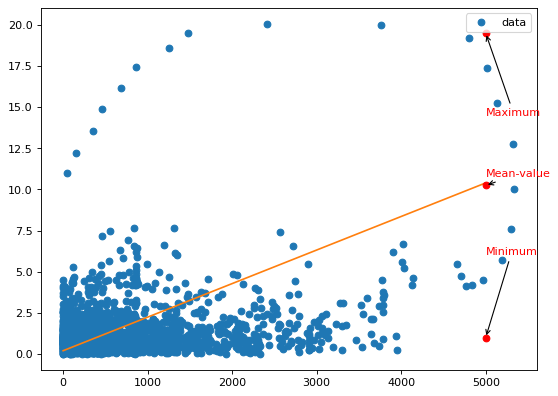

In [159]:
plot_show(5000)

CSO spills: 3000 m3/s
↓ River flow statistical data ↓
Maximum:  16.8 m3/s
Minimum:  1.0 m3/s
Mean:  8.9 m3/s
Probability of exceedance  11.299 m3/s is  5%
Probability of exceedance  10.854 m3/s is  10%
Probability of exceedance  10.451 m3/s is  20%
Probability of exceedance  9.912 m3/s is  50%
Probability of exceedance  9.441 m3/s is  90%


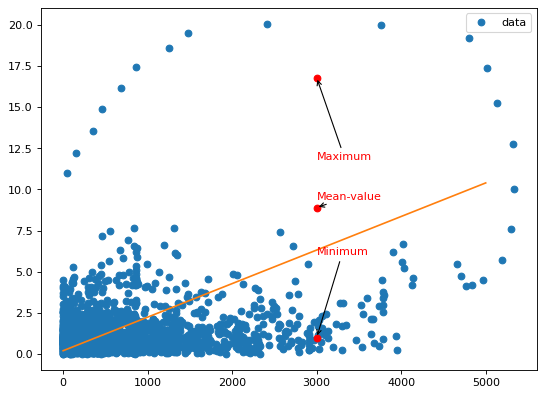

In [160]:
plot_show(3000)

CSO spills: 2000 m3/s
↓ River flow statistical data ↓
Maximum:  14.8 m3/s
Minimum:  1.0 m3/s
Mean:  7.9 m3/s
Probability of exceedance  10.299 m3/s is  5%
Probability of exceedance  9.854 m3/s is  10%
Probability of exceedance  9.451 m3/s is  20%
Probability of exceedance  8.912 m3/s is  50%
Probability of exceedance  8.441 m3/s is  90%


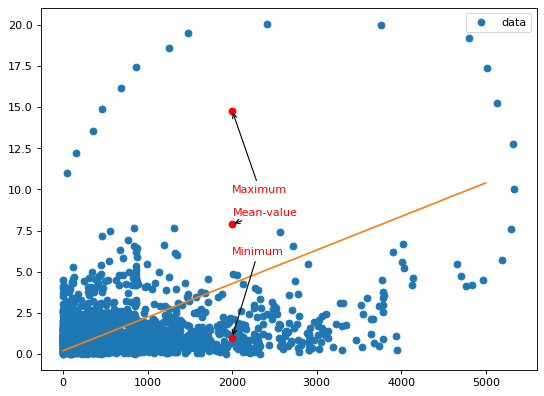

In [162]:
plot_show(2000)

CSO spills: 1000 m3/s
↓ River flow statistical data ↓
Maximum:  11.7 m3/s
Minimum:  1.0 m3/s
Mean:  6.35 m3/s
Probability of exceedance  8.749 m3/s is  5%
Probability of exceedance  8.304 m3/s is  10%
Probability of exceedance  7.901 m3/s is  20%
Probability of exceedance  7.362 m3/s is  50%
Probability of exceedance  6.891 m3/s is  90%


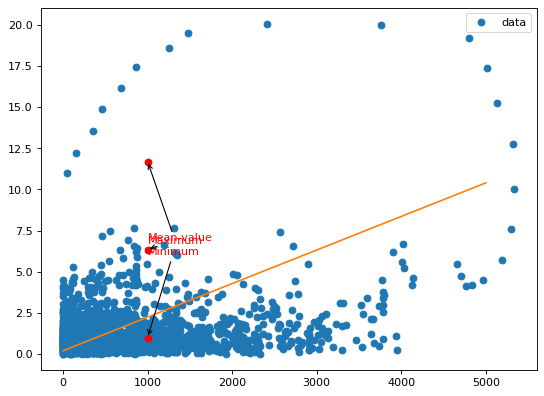

In [161]:
plot_show(1000)

CSO spills: 500 m3/s
↓ River flow statistical data ↓
Maximum:  0.7 m3/s
Minimum:  0.7 m3/s
Mean:  0.7 m3/s
Probability of exceedance  6.458 m3/s is  5%
Probability of exceedance  4.521 m3/s is  10%
Probability of exceedance  3.105 m3/s is  20%
Probability of exceedance  1.725 m3/s is  50%
Probability of exceedance  0.993 m3/s is  90%


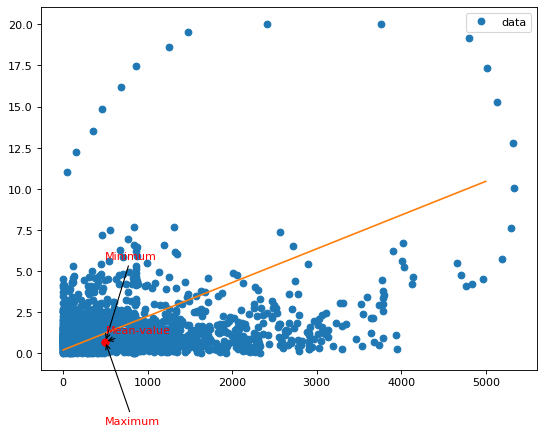

In [139]:
plot_show(500)